## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\abdos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abdos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\abdos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## File reading


In [2]:
df=pd.read_csv("house price.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Determine Outlires 

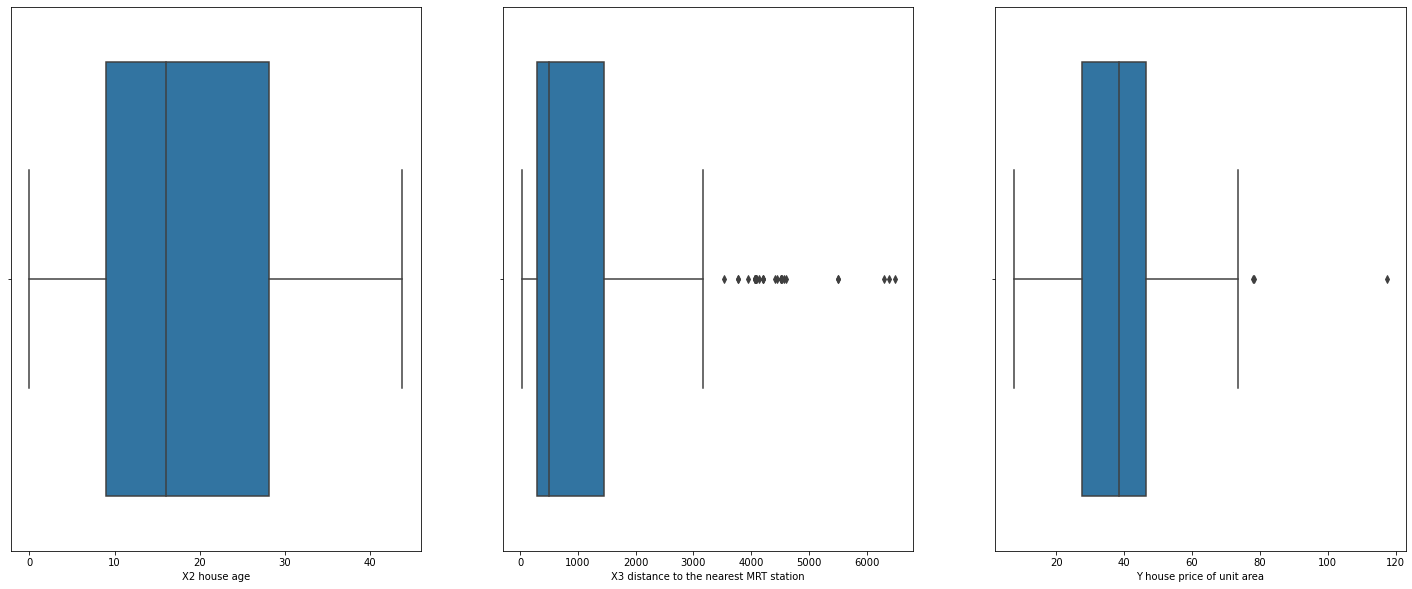

In [7]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.boxplot(x="X2 house age" , data =df )
plt.subplot(1,3,2)
sns.boxplot(x="X3 distance to the nearest MRT station" , data =df )
plt.subplot(1,3,3)
sns.boxplot(x="Y house price of unit area" , data =df );

## Drop Outlires 

In [8]:
df=df[df["X3 distance to the nearest MRT station"] < 3000 ]
df=df[df["Y house price of unit area"] < 80 ]


## Rename Columns

In [9]:
df=df. rename(columns = {'X1 transaction date':'transaction_date','X2 house age':'house_age', 'X3 distance to the nearest MRT station':'nearest MRT','X4 number of convenience stores':'stores','X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'price'})

In [10]:
df=df.reset_index(drop=True)
df


,No,transaction_date,house_age,nearest MRT,stores,latitude,longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
367,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
368,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
369,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
370,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Editing File and display more data 

## 1.Categorize prices

In [11]:
# Categorization comes from data description
# Low-Region = 0 to 25%           of date
# Mid-Region = 25% to 75%       of date
# High-Region = 75% to 100%   of date
df['price_region'] = pd.cut(x=df['price'], bins=[7,27.7,46.6,120],labels=['Low-Region', 'Mid-Region', 'High-Region'])
df

,No,transaction_date,house_age,nearest MRT,stores,latitude,longitude,price,price_region
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Mid-Region
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Mid-Region
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,High-Region
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,High-Region
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Mid-Region
...,...,...,...,...,...,...,...,...,...
367,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1,Mid-Region
368,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,High-Region
369,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,Mid-Region
370,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,High-Region


## 2.Get year and month from Transaction date	

In [12]:
# who collecting data says that (for example,    2013.250=2013 March      ,     2013.500=2013 June          , etc.)
# months were represented as a fraction of a year. So, for instance, 
# June is the 6th month of the year, hence it is 6/12 = 0.5 ; that's why we had June 2013 as 2013.500
# March is the 3rd month of the year, hence it is 3/12 = 0.250 ; that's why we had March 2013 as 2013.250 , etc

In [13]:
# 0.083 = 1/12 , thats mean its 1st month of the year ( January )
# 0.167 = 2/12 , thats mean its 2nd month of the year ( February )
# 0.25  = 3/12 , thats mean its 3rd month of the year ( March )
# 0.333 = 4/12 , thats mean its 4th month of the year ( April )
# 0.417 = 5/12 , thats mean its 5th month of the year ( May )
# 0.5 = 6/12 , thats mean its 6th month of the year ( June )
# 0.833 = 10/12 , thats mean its 10th month of the year ( October ) , etc

## 2.1 Creating function that split float (Transaction date) and return year 
## and fraction month then multiply it with 12

In [14]:
df['transaction_date'] = df['transaction_date'].astype(float)
def get_date(date,df):
    year, month = divmod(date , 1)
    df['year'] = round(year)
    if month == 0:
        df['months'] = 12
    else :
        df['months'] = round(month*12)
    return df

df=df.apply(lambda x: get_date(x['transaction_date'],x), axis=1)
df

,No,transaction_date,house_age,nearest MRT,stores,latitude,longitude,price,price_region,year,months
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Mid-Region,2012,11
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Mid-Region,2012,11
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,High-Region,2013,7
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,High-Region,2013,6
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Mid-Region,2012,10
...,...,...,...,...,...,...,...,...,...,...,...
367,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1,Mid-Region,2013,5
368,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,High-Region,2012,8
369,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,Mid-Region,2013,3
370,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,High-Region,2013,12


## 3.Dealing with latitude , longitude

In [15]:
df[['latitude','longitude']]=df[['latitude','longitude']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                372 non-null    int64  
 1   transaction_date  372 non-null    float64
 2   house_age         372 non-null    float64
 3   nearest MRT       372 non-null    float64
 4   stores            372 non-null    int64  
 5   latitude          372 non-null    object 
 6   longitude         372 non-null    object 
 7   price             372 non-null    float64
 8   price_region      372 non-null    object 
 9   year              372 non-null    int64  
 10  months            372 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 32.1+ KB


## Function that takes latitude and longitude and return location

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="abdulrahman")

import time
start = time.time()

def get_location(latitude,longitude,df):
    
    location = geolocator.reverse(latitude+","+longitude , language = 'en')
    address = location.raw['address']
    
    
    df["country"] = address.get('country')
    df["city"] = address.get('city')
    df["neighbourhood"] =address.get('neighbourhood')
    df["village"] = address.get("village")

    return df

df=df.apply(lambda x: get_location(x['latitude'], x['longitude'], x), axis=1)
end = time.time()

print("The time of execution of above program is :", end-start , "\n")
df

The time of execution of above program is : 185.89275932312012 



,No,transaction_date,house_age,nearest MRT,stores,latitude,longitude,price,price_region,year,months,country,city,neighbourhood,village
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Mid-Region,2012,11,Taiwan,New Taipei,Fuxing Village,Dapinglin
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Mid-Region,2012,11,Taiwan,New Taipei,Datong Village,Dapinglin
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,High-Region,2013,7,Taiwan,New Taipei,Xinyi Village,Dapinglin
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,High-Region,2013,6,Taiwan,New Taipei,Xinyi Village,Dapinglin
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Mid-Region,2012,10,Taiwan,New Taipei,Bao'An Village,Dapinglin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,409,2013.417,18.5,2175.74400,3,24.9633,121.51243,28.1,Mid-Region,2013,5,Taiwan,New Taipei,Gonglun Village,None
368,411,2012.667,5.6,90.45606,9,24.97433,121.5431,50.0,High-Region,2012,8,Taiwan,New Taipei,Xin'An Village,Dapinglin
369,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,Mid-Region,2013,3,Taiwan,New Taipei,Mingde Village,Dapinglin
370,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,High-Region,2013,12,Taiwan,New Taipei,Xinde Village,Dapinglin


In [ ]:
# import time
# start = time.time()
# end = time.time()
# used it to calculate  total estimated execution run time of this function,
# which is 186 seconds

In [17]:
df.isnull().sum()

No                    0
transaction_date      0
house_age             0
nearest MRT           0
stores                0
latitude              0
longitude             0
price                 0
price_region          0
year                  0
months                0
country               0
city                  0
neighbourhood         9
village             103
dtype: int64

In [18]:
df.nunique()

No                  372
transaction_date     12
house_age           223
nearest MRT         233
stores               11
latitude            208
longitude           209
price               245
price_region          3
year                  2
months               12
country               1
city                  1
neighbourhood        48
village               3
dtype: int64

In [19]:
# no unique countries, city and village 
# only unique is neighbourhood 
# fill neighbourhood  with  forward fill method

In [20]:
df['neighbourhood'] = df['neighbourhood'].fillna(method='ffill')
df.isnull().sum()

No                    0
transaction_date      0
house_age             0
nearest MRT           0
stores                0
latitude              0
longitude             0
price                 0
price_region          0
year                  0
months                0
country               0
city                  0
neighbourhood         0
village             103
dtype: int64

## Drop unusable Columns 

In [21]:
df

,No,transaction_date,house_age,nearest MRT,stores,latitude,longitude,price,price_region,year,months,country,city,neighbourhood,village
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Mid-Region,2012,11,Taiwan,New Taipei,Fuxing Village,Dapinglin
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Mid-Region,2012,11,Taiwan,New Taipei,Datong Village,Dapinglin
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,High-Region,2013,7,Taiwan,New Taipei,Xinyi Village,Dapinglin
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,High-Region,2013,6,Taiwan,New Taipei,Xinyi Village,Dapinglin
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Mid-Region,2012,10,Taiwan,New Taipei,Bao'An Village,Dapinglin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,409,2013.417,18.5,2175.74400,3,24.9633,121.51243,28.1,Mid-Region,2013,5,Taiwan,New Taipei,Gonglun Village,None
368,411,2012.667,5.6,90.45606,9,24.97433,121.5431,50.0,High-Region,2012,8,Taiwan,New Taipei,Xin'An Village,Dapinglin
369,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,Mid-Region,2013,3,Taiwan,New Taipei,Mingde Village,Dapinglin
370,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,High-Region,2013,12,Taiwan,New Taipei,Xinde Village,Dapinglin


In [22]:
df=df.drop(['No', 'transaction_date','country','city','village'], axis=1)
df=df. rename(columns = {'year':'transaction_year','months':'transaction_month'})
df

,house_age,nearest MRT,stores,latitude,longitude,price,price_region,transaction_year,transaction_month,neighbourhood
0,32.0,84.87882,10,24.98298,121.54024,37.9,Mid-Region,2012,11,Fuxing Village
1,19.5,306.59470,9,24.98034,121.53951,42.2,Mid-Region,2012,11,Datong Village
2,13.3,561.98450,5,24.98746,121.54391,47.3,High-Region,2013,7,Xinyi Village
3,13.3,561.98450,5,24.98746,121.54391,54.8,High-Region,2013,6,Xinyi Village
4,5.0,390.56840,5,24.97937,121.54245,43.1,Mid-Region,2012,10,Bao'An Village
...,...,...,...,...,...,...,...,...,...,...
367,18.5,2175.74400,3,24.9633,121.51243,28.1,Mid-Region,2013,5,Gonglun Village
368,5.6,90.45606,9,24.97433,121.5431,50.0,High-Region,2012,8,Xin'An Village
369,18.8,390.96960,7,24.97923,121.53986,40.6,Mid-Region,2013,3,Mingde Village
370,8.1,104.81010,5,24.96674,121.54067,52.5,High-Region,2013,12,Xinde Village


In [25]:
s = df.pop('price')
df = pd.concat([df, s], 1)
df

C:\Users\abdos\AppData\Local\Temp\ipykernel_10364\2033858153.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df, s], 1)


,house_age,nearest MRT,stores,latitude,longitude,price_region,transaction_year,transaction_month,neighbourhood,price
0,32.0,84.87882,10,24.98298,121.54024,Mid-Region,2012,11,Fuxing Village,37.9
1,19.5,306.59470,9,24.98034,121.53951,Mid-Region,2012,11,Datong Village,42.2
2,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,7,Xinyi Village,47.3
3,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,6,Xinyi Village,54.8
4,5.0,390.56840,5,24.97937,121.54245,Mid-Region,2012,10,Bao'An Village,43.1
...,...,...,...,...,...,...,...,...,...,...
367,18.5,2175.74400,3,24.9633,121.51243,Mid-Region,2013,5,Gonglun Village,28.1
368,5.6,90.45606,9,24.97433,121.5431,High-Region,2012,8,Xin'An Village,50.0
369,18.8,390.96960,7,24.97923,121.53986,Mid-Region,2013,3,Mingde Village,40.6
370,8.1,104.81010,5,24.96674,121.54067,High-Region,2013,12,Xinde Village,52.5


## Visualization

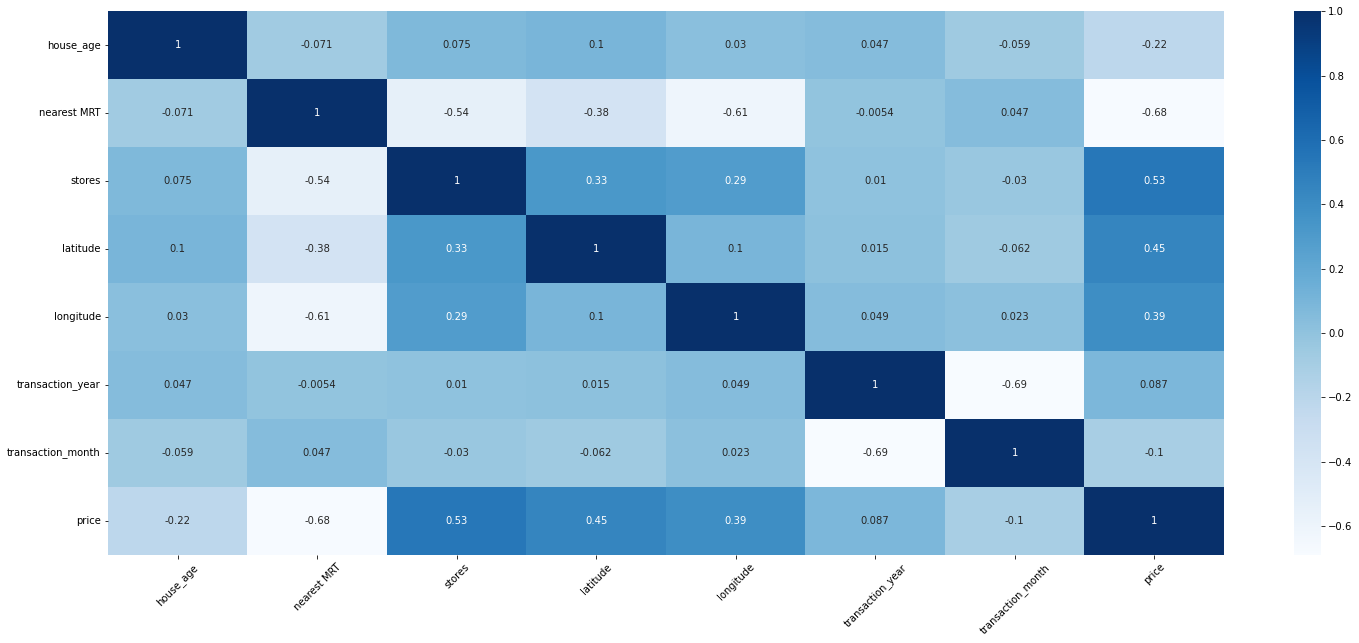

In [26]:
df[['latitude','longitude']]=df[['latitude','longitude']].astype(float)
plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.heatmap( df.corr() ,cmap='Blues', annot = True);

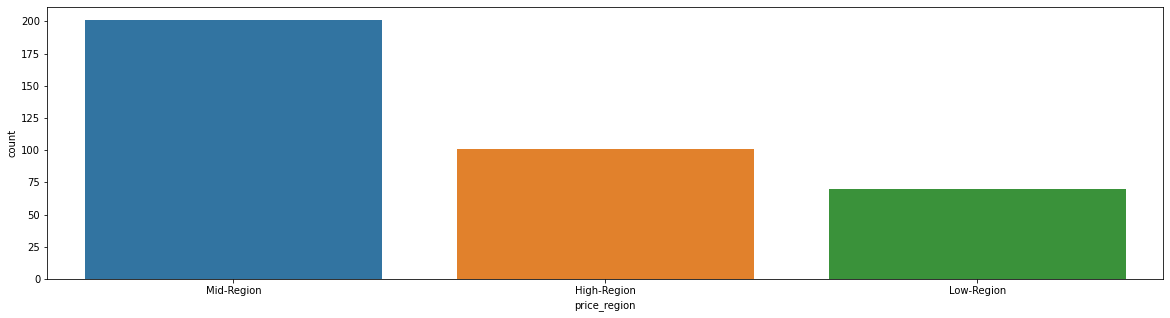

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='price_region' , data =df);
# Mid-Region Price (27.7 To 46.6) is the most

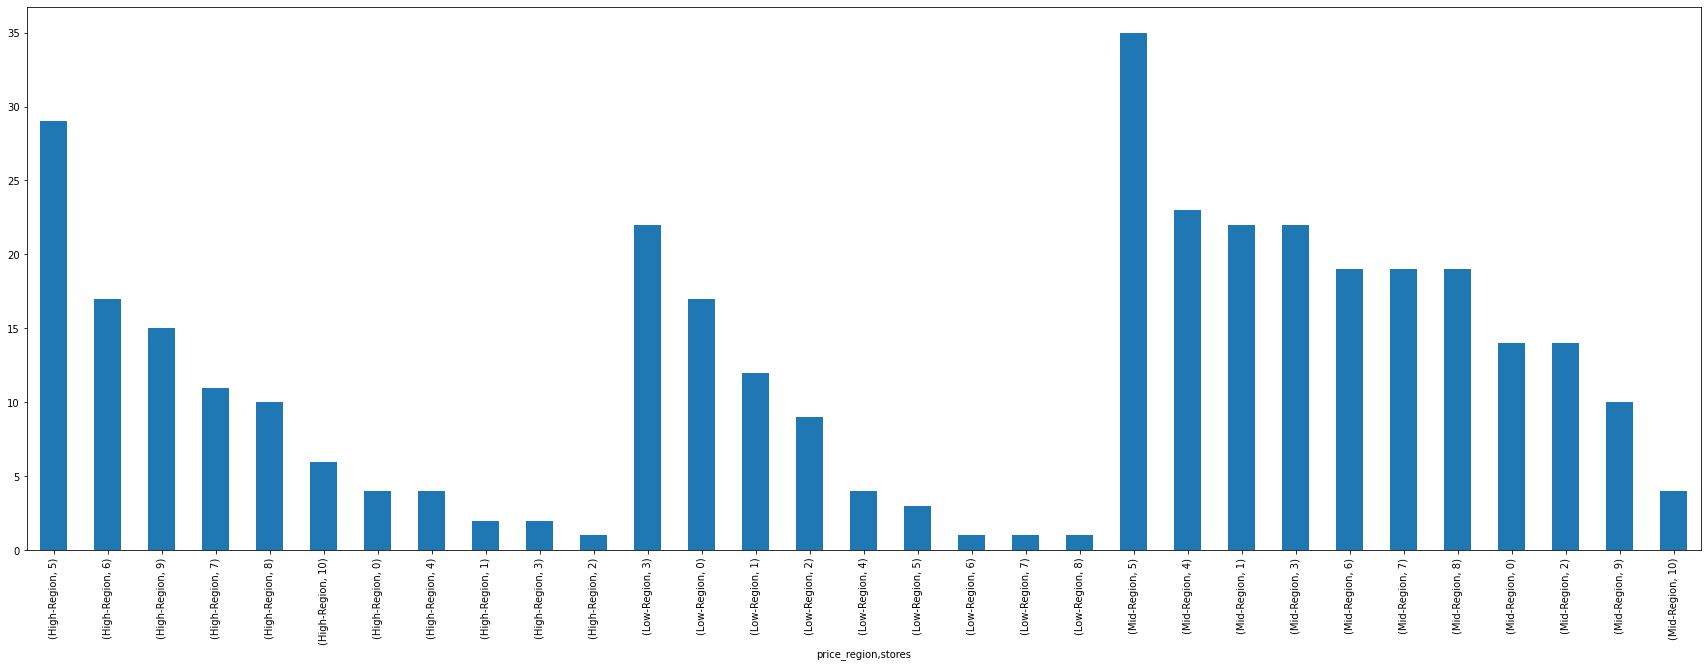

In [28]:
plt.figure(figsize=(30,10))
df.groupby("price_region")["stores"].value_counts().plot(kind = "bar");

# at cov. stores equal 5 is the most count

## Price , Age

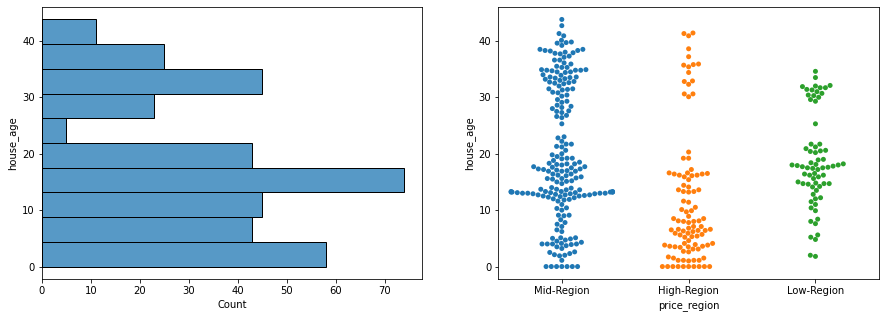

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(y=df['house_age'])
plt.subplot(1,2,2)
sns.swarmplot(x='price_region' , y='house_age' , data =df);

## How many transactions happen in each year and month, with price regions ?

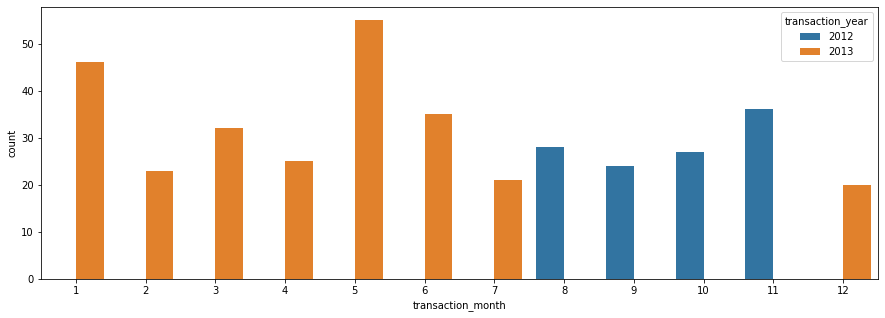

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(hue=df['transaction_year'],x=df['transaction_month']);

In [31]:
df.groupby("transaction_year")["price_region"].value_counts().unstack()


price_region,High-Region,Low-Region,Mid-Region
transaction_year,,,
2012,28,26,61
2013,73,44,140


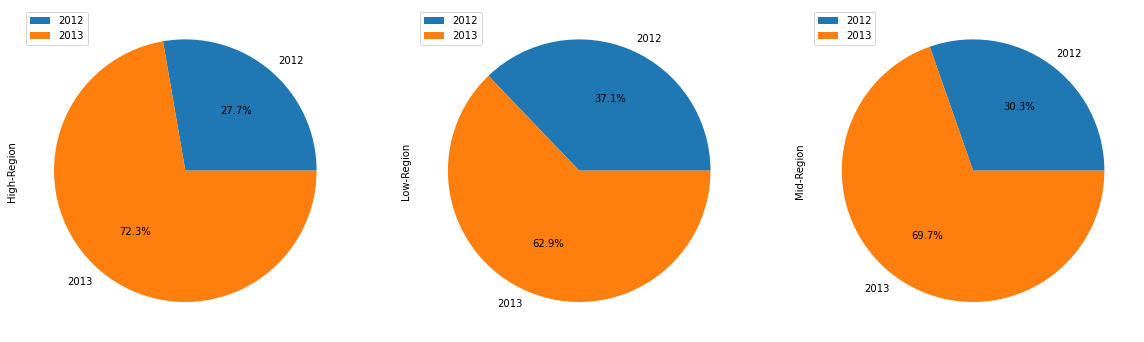

In [32]:
df.groupby("transaction_year")["price_region"].value_counts().unstack().plot(kind="pie" , subplots=True , autopct='%1.1f%%',figsize=(20,10)) ;


In [33]:
df.groupby("transaction_month")["price_region"].value_counts().unstack()

price_region,High-Region,Low-Region,Mid-Region
transaction_month,,,
1,14,8,24
2,4,4,15
3,10,6,16
4,8,4,13
5,11,8,36
6,14,4,17
7,10,5,6
8,9,4,15
9,5,5,14


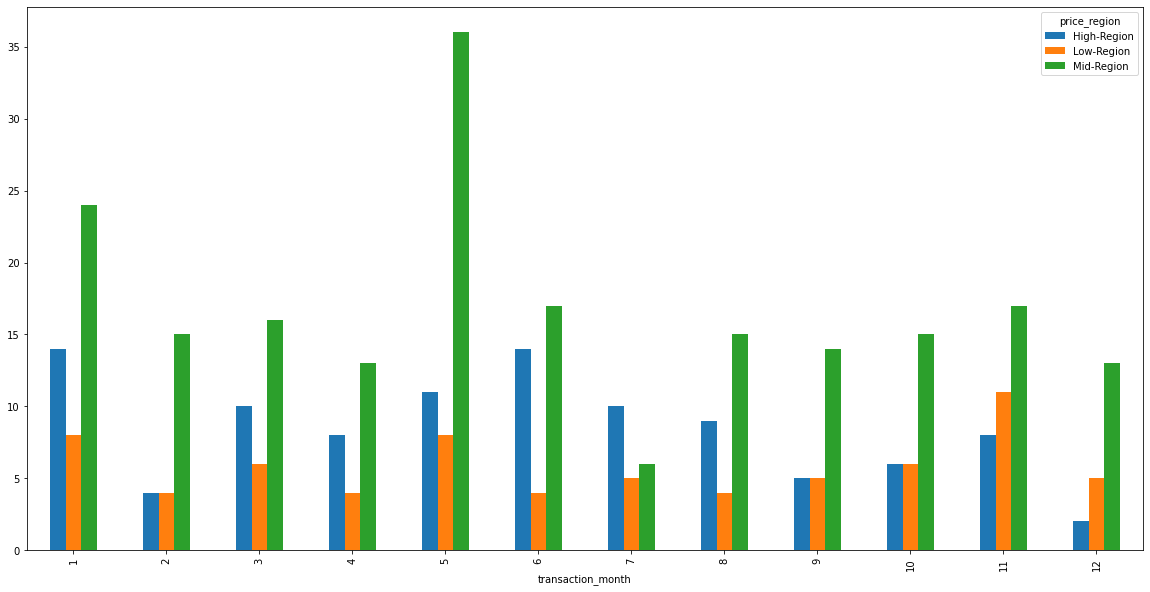

In [34]:
df.groupby("transaction_month")["price_region"].value_counts().unstack().plot(kind="bar" ,figsize=(20,10)) ;

## nearest MRT , price

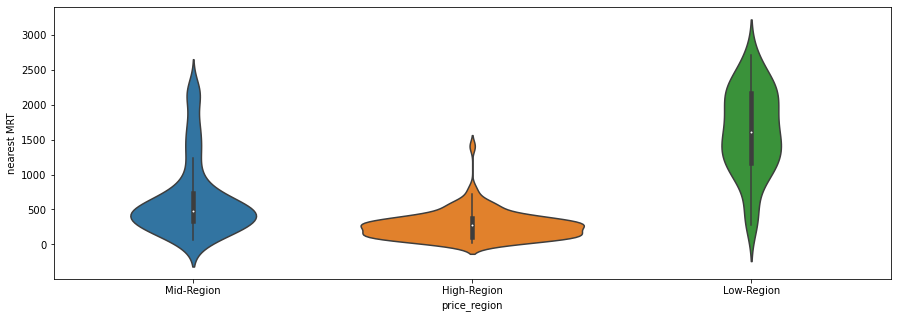

In [35]:
plt.figure(figsize=(15,5))
sns.violinplot(x='price_region' , y='nearest MRT' , data=df);


In [36]:
df.head()

,house_age,nearest MRT,stores,latitude,longitude,price_region,transaction_year,transaction_month,neighbourhood,price
0,32.0,84.87882,10,24.98298,121.54024,Mid-Region,2012,11,Fuxing Village,37.9
1,19.5,306.59470,9,24.98034,121.53951,Mid-Region,2012,11,Datong Village,42.2
2,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,7,Xinyi Village,47.3
3,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,6,Xinyi Village,54.8
4,5.0,390.56840,5,24.97937,121.54245,Mid-Region,2012,10,Bao'An Village,43.1


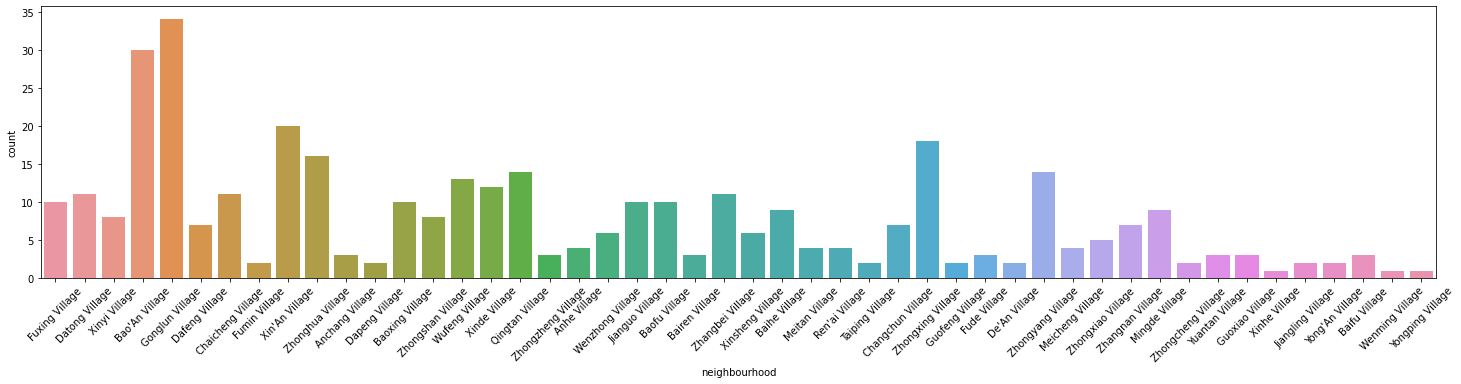

In [37]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.countplot(x=df['neighbourhood']);

# Max and Min price of each neighbourhood

In [38]:
df2=[df.groupby("neighbourhood")["price"].max(),df.groupby("neighbourhood")["price"].min()]
df2=pd.DataFrame(df2)
df2.index =['Max price' , 'Min price']
df2.T

,Max price,Min price
neighbourhood,,
Anchang Village,29.3,21.8
Anhe Village,27.0,21.4
Baifu Village,38.4,35.7
Baihe Village,62.9,31.5
Bairen Village,55.3,34.1
Bao'An Village,60.7,13.7
Baofu Village,57.1,30.6
Baoxing Village,73.6,36.6
Chaicheng Village,31.1,12.8


## Machine Learning

## encode categorical ( neighbourhood )

In [39]:
df['neighbour_encoded'] = pd.factorize(df['neighbourhood'])[0]
df


,house_age,nearest MRT,stores,latitude,longitude,price_region,transaction_year,transaction_month,neighbourhood,price,neighbour_encoded
0,32.0,84.87882,10,24.98298,121.54024,Mid-Region,2012,11,Fuxing Village,37.9,0
1,19.5,306.59470,9,24.98034,121.53951,Mid-Region,2012,11,Datong Village,42.2,1
2,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,7,Xinyi Village,47.3,2
3,13.3,561.98450,5,24.98746,121.54391,High-Region,2013,6,Xinyi Village,54.8,2
4,5.0,390.56840,5,24.97937,121.54245,Mid-Region,2012,10,Bao'An Village,43.1,3
...,...,...,...,...,...,...,...,...,...,...,...
367,18.5,2175.74400,3,24.96330,121.51243,Mid-Region,2013,5,Gonglun Village,28.1,4
368,5.6,90.45606,9,24.97433,121.54310,High-Region,2012,8,Xin'An Village,50.0,8
369,18.8,390.96960,7,24.97923,121.53986,Mid-Region,2013,3,Mingde Village,40.6,38
370,8.1,104.81010,5,24.96674,121.54067,High-Region,2013,12,Xinde Village,52.5,15


## Model

In [156]:
from sklearn.model_selection import train_test_split
x = df.drop(['price','price_region','latitude','longitude','neighbourhood'],axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=40)


In [157]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x_train, y_train)
model1.score(x_train, y_train)

0.6072658494141514

In [158]:
model1.score(x_test, y_test)

0.5296959435361261

In [159]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=1)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.5326012489927447

## Trying to improve The model with another encode mithod

In [182]:
dums = pd.get_dummies(df['neighbourhood'],prefix='prov')
dums            


,prov_Anchang Village,prov_Anhe Village,prov_Baifu Village,prov_Baihe Village,prov_Bairen Village,prov_Bao'An Village,prov_Baofu Village,prov_Baoxing Village,prov_Chaicheng Village,prov_Changchun Village,...,prov_Yuantan Village,prov_Zhangbei Village,prov_Zhangnan Village,prov_Zhongcheng Village,prov_Zhonghua Village,prov_Zhongshan Village,prov_Zhongxiao Village,prov_Zhongxing Village,prov_Zhongyang Village,prov_Zhongzheng Village
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
x

,house_age,nearest MRT,stores,transaction_year,transaction_month,neighbour_encoded
0,32.0,84.87882,10,2012,11,0
1,19.5,306.59470,9,2012,11,1
2,13.3,561.98450,5,2013,7,2
3,13.3,561.98450,5,2013,6,2
4,5.0,390.56840,5,2012,10,3
...,...,...,...,...,...,...
367,18.5,2175.74400,3,2013,5,4
368,5.6,90.45606,9,2012,8,8
369,18.8,390.96960,7,2013,3,38
370,8.1,104.81010,5,2013,12,15


In [184]:
x1 = x.drop(['transaction_year','transaction_month','neighbour_encoded'],axis=1)
x1 = x1.join(dums)
x1

,house_age,nearest MRT,stores,prov_Anchang Village,prov_Anhe Village,prov_Baifu Village,prov_Baihe Village,prov_Bairen Village,prov_Bao'An Village,prov_Baofu Village,...,prov_Yuantan Village,prov_Zhangbei Village,prov_Zhangnan Village,prov_Zhongcheng Village,prov_Zhonghua Village,prov_Zhongshan Village,prov_Zhongxiao Village,prov_Zhongxing Village,prov_Zhongyang Village,prov_Zhongzheng Village
0,32.0,84.87882,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19.5,306.59470,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.3,561.98450,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.3,561.98450,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,390.56840,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,18.5,2175.74400,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,5.6,90.45606,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369,18.8,390.96960,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,8.1,104.81010,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
y1 = y
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.2, random_state=30)
model3 = LinearRegression().fit(x1_train, y1_train)
model3.score(x1_train, y1_train)

0.7102081916521992

In [186]:
model3.score(x1_test, y1_test)

0.6871971051416514

In [187]:
from sklearn.linear_model import Lasso
model4 = Lasso(alpha=0.01)
model4.fit(x1_train, y1_train)
model4.score(x1_test, y1_test)

0.7050428134123727

In [192]:
from sklearn.linear_model import Ridge
model5 = Ridge(alpha=10)
model5.fit(x1_train, y1_train)
model5.score(x1_test, y1_test)

0.7470032781275475